In [13]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as pyplot

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [14]:

import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA


#from pyramid.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX


#FACEBOOK MODEL

#from fbprophet import Prophet


In [15]:

from math import sqrt

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


import seaborn as sns

from random import random


In [16]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

# Importing data
- Dataset: International airline passengers
- Unit: Thousands

In [17]:
#TS data library
#http://datamarket.com/data/list/?q=provider%3Atsdl
#https://data.world/perceptron/monthly-car-sales-quebec-1960


#CAR SALES
df_car_sales = pd.read_csv('monthly-car-sales-in-quebec-1960.csv')
df_car_sales

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [18]:
df_car_sales['Month'] = pd.to_datetime(df_car_sales['Month'], format='%Y-%m')
#yyyy-mm-dd
#1960-01-01

In [19]:
y_car_sales = df_car_sales.set_index('Month')
y_car_sales

,Monthly car sales in Quebec 1960-1968
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342


In [25]:
y1 = y_car_sales["Monthly car sales in Quebec 1960-1968"]
y1

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
              ...  
1968-08-01    16722
1968-09-01    14385
1968-10-01    21342
1968-11-01    17180
1968-12-01    14577
Name: Monthly car sales in Quebec 1960-1968, Length: 108, dtype: int64

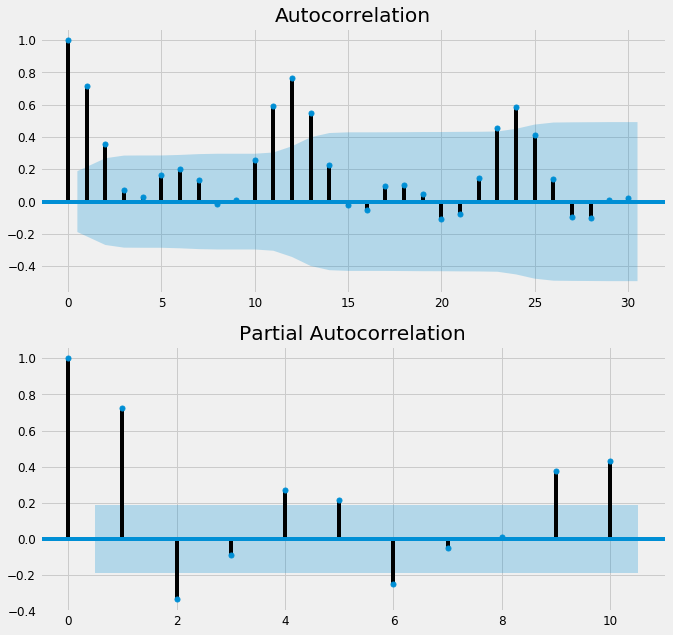

In [23]:

from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.graphics.tsaplots import plot_pacf


pyplot.figure(figsize=(10,10))
pyplot.subplot(211)

plot_acf(y_car_sales["Monthly car sales in Quebec 1960-1968"], ax=pyplot.gca(), lags = 30)
#ARMA -- ARIMA  -- lags
#exponential decay of data lags


pyplot.subplot(212)

plot_pacf(y_car_sales["Monthly car sales in Quebec 1960-1968"], ax=pyplot.gca(), lags = 10)

pyplot.show()


#AR == 
#yt = yt-1 B + .......yt-n Bn  --- n lag=previous

#coeeficients

#MA


### Plotting Rolling Statistics
- We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
- The time series is hence not stationary

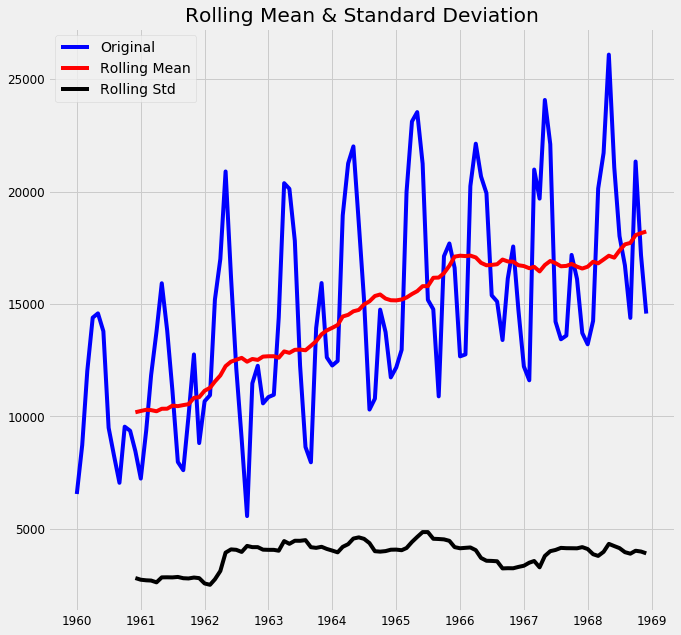

In [27]:
import pandas as pd 

#Determing rolling statistics

#rolmean = pd.rolling_mean(y, window=12)
#rolstd = pd.rolling_std(y, window=12)


pyplot.figure(figsize=(10,10))

rolmean = pd.Series(y1).rolling(window=12).mean()
rolstd = pd.Series(y1).rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(y1, color='blue',label='Original')


mean = plt.plot(rolmean, color='red', label='Rolling Mean')

std = plt.plot(rolstd, color='black', label = 'Rolling Std')

plt.legend(loc='best')

plt.title('Rolling Mean & Standard Deviation')

plt.show(block=False)







### Augmented Dickey-Fuller Test
- The intuition behind the test is that if the series is integrated then the lagged level of the series y(t-1)  will provide no relevant information in predicting the change in y(t).
- Null hypothesis: The time series is not stationary
- Rejecting the null hypothesis (i.e. a very low p-value) will indicate staionarity

In [28]:
from statsmodels.tsa.stattools import adfuller

#KAAS
#PP


In [30]:
#Perform Dickey-Fuller test:

print ('Results of Dickey-Fuller Test:')

dftest = adfuller(y1, autolag='AIC')

dftest


#NULL HYPOTHESIS --non-stationary

Results of Dickey-Fuller Test:


(-1.2238127661752862,
 0.6632691049832858,
 12,
 95,
 {'1%': -3.5011373281819504,
  '5%': -2.8924800524857854,
  '10%': -2.5832749307479226},
 1671.1995896872572)

In [31]:
##better representation of above results

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

    
print (dfoutput)

Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


In [34]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics - moving stats
   # rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    pyplot.figure(figsize=(10,10))
    ##### use below approach
    rolmean = pd.Series(timeseries).rolling(window=12).mean()

    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)

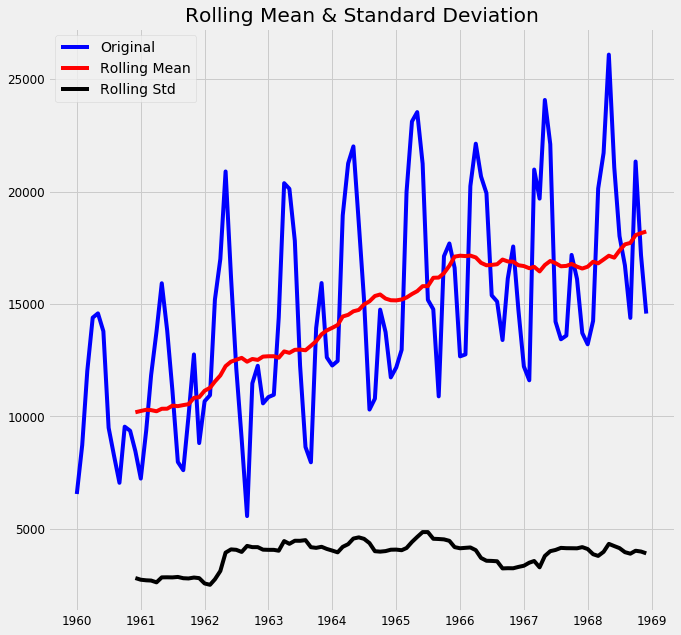

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


In [35]:
test_stationarity(y1)

### DEMO for cumsum function

# not for forecasting

In [ ]:


import numpy as np 
  
in_arr = np.array([2, 4, 6,1, 3, 5]) 
   
print ("Input array : ", in_arr)  
    
out_sum = np.cumsum(in_arr)  
print ("cumulative sum of array elements: ", out_sum) 